# **Station Popularity Analysis**

In [100]:
import pandas as pd

In [101]:
# Load the dataset
df = pd.read_csv('/kaggle/input/indian-railways-data/Train_details_22122017.csv', low_memory=False)

# Display the first few rows of the dataset
print(df.head())

  Train No    Train Name SEQ Station Code  Station Name Arrival time  \
0      107  SWV-MAO-VLNK   1          SWV  SAWANTWADI R     00:00:00   
1      107  SWV-MAO-VLNK   2         THVM        THIVIM     11:06:00   
2      107  SWV-MAO-VLNK   3         KRMI       KARMALI     11:28:00   
3      107  SWV-MAO-VLNK   4          MAO   MADGOAN JN.     12:10:00   
4      108  VLNK-MAO-SWV   1          MAO   MADGOAN JN.     00:00:00   

  Departure Time Distance Source Station Source Station Name  \
0       10:25:00        0            SWV     SAWANTWADI ROAD   
1       11:08:00       32            SWV     SAWANTWADI ROAD   
2       11:30:00       49            SWV     SAWANTWADI ROAD   
3       00:00:00       78            SWV     SAWANTWADI ROAD   
4       20:30:00        0            MAO         MADGOAN JN.   

  Destination Station Destination Station Name  
0                 MAO              MADGOAN JN.  
1                 MAO              MADGOAN JN.  
2                 MAO              

In [102]:
#handling infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [103]:
# Check for missing values
print(df.isnull().sum())

Train No                     0
Train Name                   0
SEQ                          0
Station Code                 0
Station Name                 0
Arrival time                 5
Departure Time               5
Distance                     5
Source Station              10
Source Station Name         10
Destination Station         10
Destination Station Name    10
dtype: int64


In [104]:
# Fill or drop missing values if necessary
df = df.dropna() 

In [105]:
# Convert time columns to appropriate datetime format 
df['Arrival time'] = pd.to_datetime(df['Arrival time'], format='%H:%M', errors='coerce').dt.time
df['Departure Time'] = pd.to_datetime(df['Departure Time'], format='%H:%M', errors='coerce').dt.time

In [106]:
# To check for and handle any remaining NaT values in time columns
print(df[['Arrival time', 'Departure Time']].isnull().sum())


Arrival time      186114
Departure Time    186114
dtype: int64


In [107]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 186114 entries, 0 to 186123
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Train No                  186114 non-null  object        
 1   Train Name                186114 non-null  object        
 2   SEQ                       186114 non-null  object        
 3   Station Code              186114 non-null  object        
 4   Station Name              186114 non-null  object        
 5   Arrival time              0 non-null       datetime64[ns]
 6   Departure Time            0 non-null       datetime64[ns]
 7   Distance                  186114 non-null  object        
 8   Source Station            186114 non-null  object        
 9   Source Station Name       186114 non-null  object        
 10  Destination Station       186114 non-null  object        
 11  Destination Station Name  186114 non-null  object        
dtypes: date

In [108]:
# Group data by Station Code and count the number of trains stopping at each station
station_popularity = df.groupby('Station Code').size().reset_index(name='Train Count')

In [109]:
# Display the first few rows of the processed data
print(station_popularity.head())

  Station Code  Train Count
0         AABH            4
1         AADR            8
2          AAG            4
3          AAH            6
4          AAL           24


In [110]:
import numpy as np
# Ensure no infinite values are present
station_popularity.replace([np.inf, -np.inf], np.nan, inplace=True)

In [111]:
# Identify the top 10 busiest stations
top_10_stations = station_popularity.nlargest(10, 'Train Count')

In [112]:
# Calculate and visualize the distribution of trains across all stations
import matplotlib.pyplot as plt
import seaborn as sns

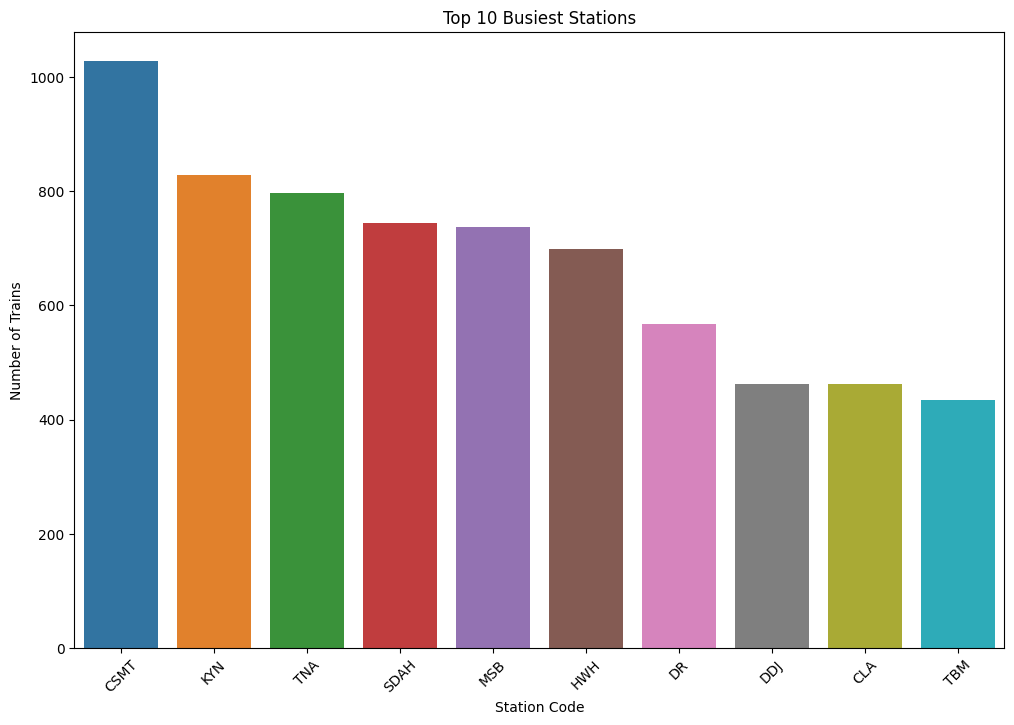

In [113]:
# Bar chart for the top 10 busiest stations
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_stations, x='Station Code', y='Train Count')
plt.title('Top 10 Busiest Stations')
plt.xlabel('Station Code')
plt.ylabel('Number of Trains')
plt.xticks(rotation=45)
plt.show()

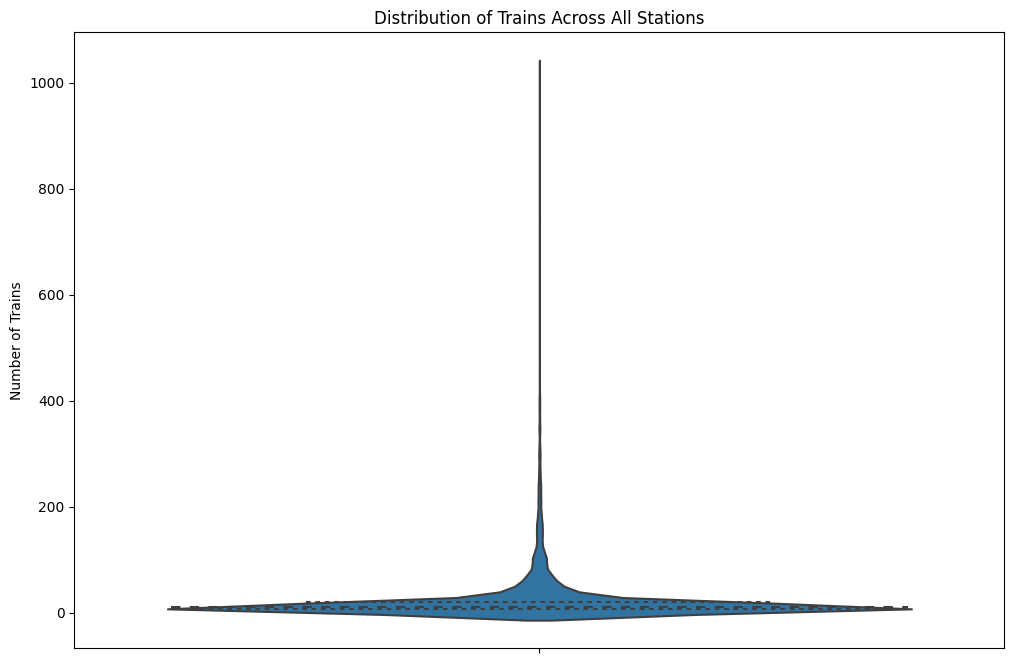

In [114]:
# Distribution of trains across all stations using a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=station_popularity, y='Train Count', inner='quartile')
plt.title('Distribution of Trains Across All Stations')
plt.ylabel('Number of Trains')
plt.show()



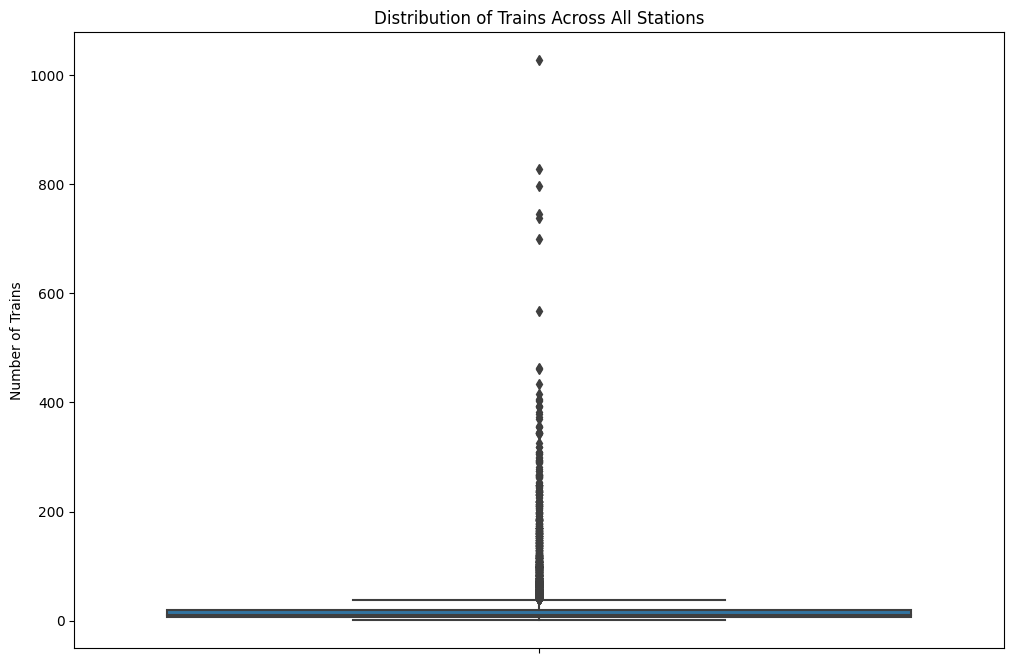

In [115]:
# Distribution of trains across all stations using a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=station_popularity, y='Train Count')
plt.title('Distribution of Trains Across All Stations')
plt.ylabel('Number of Trains')
plt.show()


In [116]:
# Group data by Station Code and count the number of trains stopping at each station
station_popularity = df.groupby('Station Code').size().reset_index(name='Train Count')

# Find the station with the highest count
most_popular_station = station_popularity.loc[station_popularity['Train Count'].idxmax()]

# Print the most popular station
print("Most popular station:")
print("Station Code:", most_popular_station['Station Code'])
print("Number of Trains:", most_popular_station['Train Count'])


Most popular station:
Station Code: CSMT
Number of Trains: 1027
